# In this nootbook, I will be retreiving and exploring the 2021 NFL Season Fantasy Points data from Pro Football Reference using Python. First I will do some data cleaning to get the data ready for an exploratory data analysis. 
# After cleaning the data, I will break down the top 15 players by points per game and top 15 players py each positions (QB, RB, WR). 

In [991]:
# Importing the libaries needed
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating an URL 

In [992]:
str=2021
base_url= "https://www.pro-football-reference.com/years/{}/fantasy.htm"
url = base_url.format(str)
url

'https://www.pro-football-reference.com/years/2021/fantasy.htm'

In [993]:
# Pulling the data using html
nfl = pd.read_html("https://www.pro-football-reference.com/years/2021/fantasy.htm", header=1)
nfl = nfl[0]
nfl

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0,0,0,0,0,332,1811,5.45,18,51,40,360,9.00,2,4,2,20,NaN,NaN,333,373.1,381.1,353.1,187,1,1
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0,1,0,0,0,4,18,4.50,0,191,145,1947,13.43,16,0,0,16,1,NaN,295,439.5,442.5,367.0,173,1,2
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1,2,24,1,0,59,365,6.19,8,121,77,1405,18.25,6,4,2,14,NaN,NaN,262,339.0,347.0,300.5,140,2,3
3,4,Josh Allen,BUF,QB,25,17,17,409,646,4407,36,15,122,763,6.25,6,0,0,0,NaN,0,8,3,6,2,1,403,402.6,426.6,417.6,134,1,4
4,5,Austin Ekeler,LAC,RB,26,16,16,0,0,0,0,0,206,911,4.42,12,94,70,647,9.24,8,4,3,20,2,NaN,274,343.8,352.8,308.8,128,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,666,Travis Benjamin,SFO,NaN,32,10,0,0,0,0,0,0,0,0,NaN,0,5,0,0,NaN,0,1,1,0,NaN,NaN,-2,-2.0,-1.0,-2.0,NaN,260,NaN
688,667,Trenton Cannon,2TM,RB,27,12,0,0,0,0,0,0,3,4,1.33,0,0,0,0,NaN,0,1,1,0,NaN,NaN,-2,-1.6,-0.6,-1.6,NaN,179,NaN
689,668,John Wolford,LAR,QB,26,3,0,1,4,5,0,1,2,-1,-0.50,0,0,0,0,NaN,0,0,0,0,NaN,NaN,-2,-1.9,-0.9,-0.9,NaN,84,NaN
690,669,Josh Rosen,ATL,QB,24,4,0,2,11,19,0,2,0,0,NaN,0,0,0,0,NaN,0,0,0,0,NaN,NaN,-3,-3.2,-1.2,-1.2,NaN,85,NaN


# Cleaning Data

In [994]:
# To view which rows to delete
nfl_to_delete = nfl[nfl["Age"]=="Age"]
nfl_to_delete

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
29,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
60,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
91,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
122,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
153,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
587,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
618,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
649,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att,Yds,Y/A,TD,Tgt,Rec,Yds,Y/R,TD,Fmb,FL,TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank


In [995]:
# To view how many rows should be deleted
nfl_to_delete.shape

(22, 33)

In [996]:
# Droping the rows that don't belong in the dataframe
nfl=nfl.drop(nfl[nfl["Age"]=="Age"].index)

In [997]:
# What columns there are in the dataframe
nfl.columns

Index(['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Yds',
       'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1', 'Tgt', 'Rec', 'Yds.2',
       'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP', 'FantPt', 'PPR',
       'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank'],
      dtype='object')

In [998]:
# To view what types of data are in the dataframe
nfl.dtypes

Rk         object
Player     object
Tm         object
FantPos    object
Age        object
            ...  
DKPt       object
FDPt       object
VBD        object
PosRank    object
OvRank     object
Length: 33, dtype: object

In [999]:
# To veiw the first 5 rows of the dataframe
nfl.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0,0,0,0,0,332,1811,5.45,18,51,40,360,9.00,2,4,2,20,NaN,NaN,333,373.1,381.1,353.1,187,1,1
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0,1,0,0,0,4,18,4.50,0,191,145,1947,13.43,16,0,0,16,1,NaN,295,439.5,442.5,367.0,173,1,2
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1,2,24,1,0,59,365,6.19,8,121,77,1405,18.25,6,4,2,14,NaN,NaN,262,339.0,347.0,300.5,140,2,3
3,4,Josh Allen,BUF,QB,25,17,17,409,646,4407,36,15,122,763,6.25,6,0,0,0,NaN,0,8,3,6,2,1,403,402.6,426.6,417.6,134,1,4
4,5,Austin Ekeler,LAC,RB,26,16,16,0,0,0,0,0,206,911,4.42,12,94,70,647,9.24,8,4,3,20,2,NaN,274,343.8,352.8,308.8,128,2,5


In [1000]:
# To view all the columns and 15 rows in the data frame
pd.set_option("display.max_column", None)
pd.set_option("display.max_row", 15)

# Filling in Missing Values 

In [1001]:
# Filling na and nan with 0
nfl = nfl.fillna(0)
nfl = nfl.replace(np.nan,0)

# Changing Column's Datatype

In [1002]:
# Changing columns to integer
columns_to_int = ["Age","G","GS", "Cmp", "Att", "Yds", "TD", "Int", "Att.1", "Yds.1", "TD.1", "Tgt", "Rec", "Yds.2", "TD.2", "Fmb", "FL", "TD.3", "FantPt", "PosRank", "OvRank"]
nfl[columns_to_int]=nfl[columns_to_int].astype("int64")

In [1003]:
# Changing columns to float
columns_to_float = ["Y/A", "Y/R", "PPR", "DKPt", "FDPt"]
nfl[columns_to_float] = nfl[columns_to_float].astype("float")

In [1004]:
nfl.dtypes

Rk          object
Player      object
Tm          object
FantPos     object
Age          int64
            ...   
DKPt       float64
FDPt       float64
VBD         object
PosRank      int64
OvRank       int64
Length: 33, dtype: object

In [1005]:
nfl.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0,0,0,0,0,332,1811,5.45,18,51,40,360,9.00,2,4,2,20,0,0,333,373.1,381.1,353.1,187,1,1
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0,1,0,0,0,4,18,4.50,0,191,145,1947,13.43,16,0,0,16,1,0,295,439.5,442.5,367.0,173,1,2
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1,2,24,1,0,59,365,6.19,8,121,77,1405,18.25,6,4,2,14,0,0,262,339.0,347.0,300.5,140,2,3
3,4,Josh Allen,BUF,QB,25,17,17,409,646,4407,36,15,122,763,6.25,6,0,0,0,0.00,0,8,3,6,2,1,403,402.6,426.6,417.6,134,1,4
4,5,Austin Ekeler,LAC,RB,26,16,16,0,0,0,0,0,206,911,4.42,12,94,70,647,9.24,8,4,3,20,2,0,274,343.8,352.8,308.8,128,2,5


# Changing Column's Names


In [1006]:
nfl = nfl.rename(columns={"FanPos":"Pos", "Att.1" : "Rush_att", "Yds.1" : "Rush_yds", "Y/A" : "Rush_Y/A","TD.1" :"Rushing_td", "Yds.2" : "Receiving_yds", "TD.2" : "Receiving_tds"})

In [1007]:
# Dropping columns we dont need
nfl= nfl.drop(columns=["VBD", "2PM", "2PP"])

# Creating a New Column

In [1008]:
# Creating PPR point per game
nfl["PPR_per_game"] = nfl.PPR / nfl.G

In [1009]:
nfl = nfl.fillna(0)
nfl = nfl.replace(np.nan,0)
nfl.replace([np.inf, -np.inf], 0, inplace=True)

In [1010]:
nfl.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Rush_att,Rush_yds,Rush_Y/A,Rushing_td,Tgt,Rec,Receiving_yds,Y/R,Receiving_tds,Fmb,FL,TD.3,FantPt,PPR,DKPt,FDPt,PosRank,OvRank,PPR_per_game
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0,0,0,0,0,332,1811,5.45,18,51,40,360,9.00,2,4,2,20,333,373.1,381.1,353.1,1,1,21.947059
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0,1,0,0,0,4,18,4.50,0,191,145,1947,13.43,16,0,0,16,295,439.5,442.5,367.0,1,2,25.852941
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1,2,24,1,0,59,365,6.19,8,121,77,1405,18.25,6,4,2,14,262,339.0,347.0,300.5,2,3,21.187500
3,4,Josh Allen,BUF,QB,25,17,17,409,646,4407,36,15,122,763,6.25,6,0,0,0,0.00,0,8,3,6,403,402.6,426.6,417.6,1,4,23.682353
4,5,Austin Ekeler,LAC,RB,26,16,16,0,0,0,0,0,206,911,4.42,12,94,70,647,9.24,8,4,3,20,274,343.8,352.8,308.8,2,5,21.487500


In [1011]:
# Rounding the data
nfl["PPR_per_game"] = round(nfl["PPR_per_game"],2)

# Grouping by Positions (RB, Wr, QB)

In [1012]:
# Finding out who were the top 15 Running backs by PPR_per_game
Running_back = nfl.groupby("FantPos").get_group("RB")
Running_back.sort_values(by="PPR_per_game", inplace= True, ascending=False)
Top_15_rb = Running_back.head(15)
Top_15_rb

/var/folders/39/mjgfxyv55bb1ly83l8jrr4vc0000gn/T/ipykernel_1047/3778839917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Running_back.sort_values(by="PPR_per_game", inplace= True, ascending=False)


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Rush_att,Rush_yds,Rush_Y/A,Rushing_td,Tgt,Rec,Receiving_yds,Y/R,Receiving_tds,Fmb,FL,TD.3,FantPt,PPR,DKPt,FDPt,PosRank,OvRank,PPR_per_game
44,44,Derrick Henry,TEN,RB,27,8,8,1,1,5,1,0,219,937,4.28,10,20,18,154,8.56,0,1,0,10,175,193.3,199.3,184.3,14,44,24.16
0,1,Jonathan Taylor*+,IND,RB,22,17,17,0,0,0,0,0,332,1811,5.45,18,51,40,360,9.00,2,4,2,20,333,373.1,381.1,353.1,1,1,21.95
4,5,Austin Ekeler,LAC,RB,26,16,16,0,0,0,0,0,206,911,4.42,12,94,70,647,9.24,8,4,3,20,274,343.8,352.8,308.8,2,5,21.49
34,34,Leonard Fournette,TAM,RB,26,14,13,0,1,0,0,0,180,812,4.51,8,84,69,454,6.58,2,1,0,10,187,255.6,261.6,221.1,11,34,18.26
143,140,Christian McCaffrey,CAR,RB,25,7,7,0,0,0,0,0,99,442,4.46,1,41,37,343,9.27,1,1,0,2,91,127.5,133.5,109.0,44,0,18.21
32,32,Alvin Kamara*,NOR,RB,26,13,10,0,0,0,0,0,240,898,3.74,4,67,47,439,9.34,5,0,0,9,188,234.7,240.7,211.2,9,32,18.05
10,11,Joe Mixon*,CIN,RB,25,16,16,0,0,0,0,0,292,1205,4.13,13,48,42,314,7.48,3,2,1,16,246,287.9,294.9,266.9,3,11,17.99
13,14,Najee Harris*,PIT,RB,23,17,17,0,0,0,0,0,307,1200,3.91,7,94,74,467,6.31,3,0,0,10,227,300.7,306.7,263.7,4,14,17.69
15,16,James Conner*,ARI,RB,26,15,6,0,0,0,0,0,202,752,3.72,15,39,37,375,10.14,3,2,0,18,221,257.7,263.7,239.2,5,16,17.18
74,73,D'Andre Swift,DET,RB,22,13,4,0,1,0,0,0,151,617,4.09,5,78,62,452,7.29,2,2,1,7,147,208.9,215.9,177.9,23,73,16.07


In [1013]:
 # Finding out who were the top 15 Receivers by PPR_per_game
receivers = nfl.groupby("FantPos").get_group("WR")
receivers.sort_values(by="PPR_per_game", inplace= True, ascending=False)
Top_15_wr = receivers.head(15)
Top_15_wr

/var/folders/39/mjgfxyv55bb1ly83l8jrr4vc0000gn/T/ipykernel_1047/2828250321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receivers.sort_values(by="PPR_per_game", inplace= True, ascending=False)


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Rush_att,Rush_yds,Rush_Y/A,Rushing_td,Tgt,Rec,Receiving_yds,Y/R,Receiving_tds,Fmb,FL,TD.3,FantPt,PPR,DKPt,FDPt,PosRank,OvRank,PPR_per_game
1,2,Cooper Kupp*+,LAR,WR,28,17,17,0,1,0,0,0,4,18,4.50,0,191,145,1947,13.43,16,0,0,16,295,439.5,442.5,367.0,1,2,25.85
11,12,Davante Adams*+,GNB,WR,29,16,16,0,0,0,0,0,0,0,0.00,0,169,123,1553,12.63,11,0,0,11,221,344.3,347.3,282.8,5,12,21.52
2,3,Deebo Samuel*+,SFO,WR,25,16,15,1,2,24,1,0,59,365,6.19,8,121,77,1405,18.25,6,4,2,14,262,339.0,347.0,300.5,2,3,21.19
9,10,Justin Jefferson*,MIN,WR,22,17,17,2,4,35,0,0,6,14,2.33,0,167,108,1616,14.96,10,1,1,10,222,330.4,334.4,276.4,4,10,19.44
8,9,Ja'Marr Chase*,CIN,WR,21,17,17,0,0,0,0,0,7,21,3.00,0,128,81,1455,17.96,13,2,1,13,224,304.6,308.6,264.1,3,9,17.92
18,19,Tyreek Hill*,KAN,WR,27,17,16,0,0,0,0,0,9,96,10.67,0,159,111,1239,11.16,9,2,1,9,186,296.5,300.5,241.0,7,19,17.44
52,52,Chris Godwin,TAM,WR,25,14,14,0,0,0,0,0,4,21,5.25,1,127,98,1103,11.26,5,2,2,6,144,242.4,247.4,193.4,19,52,17.31
171,167,Antonio Brown,TAM,WR,33,7,3,0,0,0,0,0,1,6,6.00,0,62,42,545,12.98,4,0,0,4,79,121.1,124.1,100.1,57,0,17.30
30,30,Diontae Johnson*,PIT,WR,25,16,14,0,0,0,0,0,5,53,10.60,0,169,107,1161,10.85,8,2,2,8,167,274.4,279.4,220.9,12,30,17.15
20,21,Stefon Diggs*,BUF,WR,28,17,17,0,0,0,0,0,0,0,0.00,0,164,103,1225,11.89,10,1,0,10,183,285.5,288.5,234.0,8,21,16.79


In [1014]:
 # Finding out who were the top 15 Quaterbacks by PPR_per_game
quaterbacks = nfl.groupby("FantPos").get_group("QB")
quaterbacks.sort_values(by="PPR_per_game",inplace= True, ascending=False)
Top_15_QB = quaterbacks.head(15)
Top_15_QB

/var/folders/39/mjgfxyv55bb1ly83l8jrr4vc0000gn/T/ipykernel_1047/2624692118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quaterbacks.sort_values(by="PPR_per_game",inplace= True, ascending=False)


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Rush_att,Rush_yds,Rush_Y/A,Rushing_td,Tgt,Rec,Receiving_yds,Y/R,Receiving_tds,Fmb,FL,TD.3,FantPt,PPR,DKPt,FDPt,PosRank,OvRank,PPR_per_game
3,4,Josh Allen,BUF,QB,25,17,17,409,646,4407,36,15,122,763,6.25,6,0,0,0,0.0,0,8,3,6,403,402.6,426.6,417.6,1,4,23.68
5,6,Justin Herbert*,LAC,QB,23,17,17,443,672,5014,38,15,63,302,4.79,3,0,0,0,0.0,0,1,1,3,381,380.8,402.8,395.8,2,6,22.40
6,7,Tom Brady*,TAM,QB,44,17,17,485,719,5316,43,12,28,81,2.89,2,0,0,0,0.0,0,4,3,2,375,374.7,392.7,386.7,3,7,22.04
40,40,Kyler Murray*,ARI,QB,24,14,14,333,481,3787,24,10,88,423,4.81,5,0,0,7,0.0,0,13,0,5,300,300.5,316.5,310.5,10,40,21.46
12,13,Patrick Mahomes*,KAN,QB,26,17,17,436,658,4839,37,13,66,381,5.77,2,0,0,0,0.0,0,9,4,2,362,361.7,384.7,374.7,4,13,21.28
17,18,Aaron Rodgers*+,GNB,QB,38,16,16,366,531,4115,37,4,33,101,3.06,3,1,1,-4,-4.0,0,3,0,3,332,333.3,343.3,336.8,5,18,20.83
31,31,Jalen Hurts,PHI,QB,23,15,15,265,432,3144,16,9,139,784,5.64,10,1,0,0,0.0,0,9,2,10,312,312.2,329.2,321.2,9,31,20.81
22,23,Dak Prescott,DAL,QB,28,16,16,410,596,4449,37,10,48,146,3.04,1,0,0,0,0.0,0,14,6,1,321,320.6,342.6,330.6,7,23,20.04
83,82,Lamar Jackson*,BAL,QB,24,12,12,246,382,2882,16,13,133,767,5.77,2,0,0,0,0.0,0,6,3,2,240,240.0,262.0,253.0,16,0,20.00
28,29,Joe Burrow,CIN,QB,25,16,16,366,520,4611,34,14,40,118,2.95,2,0,0,0,0.0,0,5,2,2,314,314.2,336.2,328.2,8,29,19.64


# Grouping and Sorting 

In [1015]:
# Top 15 players with the most PPR points by season
Top_15 = nfl.groupby("Player")["PPR"].mean().reset_index().sort_values(by = "PPR", ascending=False)
Top_15_by_Season= Top_15.head(15)
Top_15_by_Season

,Player,PPR
123,Cooper Kupp*+,439.5
357,Josh Allen,402.6
371,Justin Herbert*,380.8
607,Tom Brady*,374.7
345,Jonathan Taylor*+,373.1
522,Patrick Mahomes*,361.7
167,Davante Adams*+,344.3
43,Austin Ekeler,343.8
190,Deebo Samuel*+,339.0
4,Aaron Rodgers*+,333.3


In [1016]:
# Top 15 players with the most PPR points per game
nfl_per_game_top15 = nfl.groupby(["Player","FantPos"])["PPR_per_game"].mean().reset_index().sort_values(by = "PPR_per_game", ascending=False)
Top_15_PPR_per_game = nfl_per_game_top15.head(15)
Top_15_PPR_per_game

,Player,FantPos,PPR_per_game
123,Cooper Kupp*+,WR,25.85
202,Derrick Henry,RB,24.16
357,Josh Allen,QB,23.68
371,Justin Herbert*,QB,22.40
607,Tom Brady*,QB,22.04
345,Jonathan Taylor*+,RB,21.95
167,Davante Adams*+,WR,21.52
43,Austin Ekeler,RB,21.49
420,Kyler Murray*,QB,21.46
522,Patrick Mahomes*,QB,21.28


In [1017]:
# Quaterbacks in the top 15 PPR per game
position = ["QB"]
QB_in_top_15_PPR_per_game = Top_15_PPR_per_game[Top_15_PPR_per_game["FantPos"].isin(position)]
QB_in_top_15_PPR_per_game


,Player,FantPos,PPR_per_game
357,Josh Allen,QB,23.68
371,Justin Herbert*,QB,22.40
607,Tom Brady*,QB,22.04
420,Kyler Murray*,QB,21.46
522,Patrick Mahomes*,QB,21.28
4,Aaron Rodgers*+,QB,20.83
294,Jalen Hurts,QB,20.81
141,Dak Prescott,QB,20.04
423,Lamar Jackson*,QB,20.00


In [1018]:
# Runningbacks in the top 15 PPR per game
position = ["RB"]
RB_in_top_15_PPR_per_game = Top_15_PPR_per_game[Top_15_PPR_per_game["FantPos"].isin(position)]
RB_in_top_15_PPR_per_game

,Player,FantPos,PPR_per_game
202,Derrick Henry,RB,24.16
345,Jonathan Taylor*+,RB,21.95
43,Austin Ekeler,RB,21.49


In [1019]:
# Wide Receivers in the top 15 PPR per game
position = ["WR"]
WR_in_top_15_PPR_per_game = Top_15_PPR_per_game[Top_15_PPR_per_game["FantPos"].isin(position)]
WR_in_top_15_PPR_per_game

,Player,FantPos,PPR_per_game
123,Cooper Kupp*+,WR,25.85
167,Davante Adams*+,WR,21.52
190,Deebo Samuel*+,WR,21.19


In [1020]:
# Percentage breakdown of the positions in the top 15 player per PPR by game 
Percent_QB_in_top15 = (len(QB_in_top_15_PPR_per_game) / len(Top_15_PPR_per_game)) * 100
qb = Percent_QB_in_top15
What_percent_qb = "{}" + " % of player in the top 15 player per PPR by game are Quaterbacks"
print(What_percent_qb.format(qb))

Percent_RB_in_top15 = (len(RB_in_top_15_PPR_per_game) / len(Top_15_PPR_per_game)) * 100
rb = Percent_RB_in_top15
What_percent_rb = "{}" + " % of player in the top 15 player per PPR by game are Runningbacks"
print(What_percent_rb.format(rb))

Percent_WR_in_top15 = (len(WR_in_top_15_PPR_per_game) / len(Top_15_PPR_per_game)) * 100
wr = Percent_RB_in_top15
What_percent_wr = "{}" + " % of player in the top 15 player per PPR by game are Wide Receivers"
print(What_percent_wr.format(wr))

60.0 % of player in the top 15 player per PPR by game are Quaterbacks
20.0 % of player in the top 15 player per PPR by game are Runningbacks
20.0 % of player in the top 15 player per PPR by game are Wide Receivers


In [1021]:
Top_15_PPR_per_game.describe()

,PPR_per_game
count,15.000000
mean,21.913333
std,1.579899
min,20.000000
25%,21.010000
50%,21.490000
75%,22.220000
max,25.850000


In [1022]:
matrix = nfl.corr
matrix()

,Age,G,GS,Cmp,Att,Yds,TD,Int,Rush_att,Rush_yds,Rush_Y/A,Rushing_td,Tgt,Rec,Receiving_yds,Y/R,Receiving_tds,Fmb,FL,TD.3,FantPt,PPR,DKPt,FDPt,PosRank,OvRank,PPR_per_game
Age,1.000000,0.025437,0.107925,0.195281,0.190003,0.192075,0.213613,0.128292,-0.094493,-0.115003,-0.071049,-0.065316,-0.046606,-0.049508,-0.043157,-0.102241,0.002324,0.106882,0.081817,-0.042837,0.076010,0.048755,0.051584,0.064700,-0.100963,-0.045315,0.087141
G,0.025437,1.000000,0.594952,0.154077,0.151367,0.156775,0.156156,0.127980,0.236228,0.233163,0.188700,0.205675,0.520398,0.524312,0.481337,0.383454,0.409698,0.259231,0.255462,0.444450,0.493876,0.556118,0.555034,0.527123,-0.499965,0.247226,0.375805
GS,0.107925,0.594952,1.000000,0.388953,0.388396,0.390548,0.376462,0.361758,0.308101,0.315180,0.194720,0.318360,0.653890,0.650437,0.629415,0.220184,0.543765,0.429082,0.410371,0.611464,0.778609,0.827194,0.826511,0.809541,-0.681731,0.408058,0.743293
Cmp,0.195281,0.154077,0.388953,1.000000,0.998657,0.997355,0.962788,0.940467,0.126754,0.126842,0.113901,0.167864,-0.184587,-0.183720,-0.165495,-0.309704,-0.138546,0.788489,0.655412,0.007908,0.640286,0.476520,0.501326,0.576008,-0.292036,0.079807,0.458876
Att,0.190003,0.151367,0.388396,0.998657,1.000000,0.995154,0.955898,0.947992,0.128930,0.130985,0.118260,0.172485,-0.186616,-0.185762,-0.167299,-0.312710,-0.140163,0.792367,0.662046,0.009775,0.637610,0.473733,0.499014,0.573541,-0.294150,0.075279,0.458686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DKPt,0.051584,0.555034,0.826511,0.501326,0.499014,0.506685,0.509566,0.456801,0.494582,0.504829,0.320934,0.505493,0.662112,0.684884,0.655623,0.169033,0.590471,0.555818,0.513113,0.774528,0.975378,0.999328,1.000000,0.994171,-0.719488,0.505717,0.926965
FDPt,0.064700,0.527123,0.809541,0.576008,0.573541,0.581799,0.584325,0.526650,0.512111,0.523258,0.317899,0.530263,0.580951,0.603764,0.578993,0.116807,0.531039,0.602805,0.545499,0.746879,0.993278,0.991112,0.994171,1.000000,-0.702735,0.487043,0.922859
PosRank,-0.100963,-0.499965,-0.681731,-0.292036,-0.294150,-0.291507,-0.277494,-0.287454,-0.394272,-0.393753,-0.275254,-0.372824,-0.524900,-0.549236,-0.505945,-0.148763,-0.472714,-0.377054,-0.348116,-0.599345,-0.679693,-0.716670,-0.719488,-0.702735,1.000000,-0.382235,-0.727596
OvRank,-0.045315,0.247226,0.408058,0.079807,0.075279,0.083879,0.096068,0.061066,0.307292,0.306398,0.164664,0.297037,0.443443,0.470946,0.435193,0.086142,0.376241,0.171951,0.129910,0.475117,0.460401,0.513625,0.505717,0.487043,-0.382235,1.000000,0.458781


In [1023]:
paired = matrix()
unstack = paired.unstack()
unstack

Age           Age             1.000000
              G               0.025437
              GS              0.107925
              Cmp             0.195281
              Att             0.190003
                                ...   
PPR_per_game  DKPt            0.926965
              FDPt            0.922859
              PosRank        -0.727596
              OvRank          0.458781
              PPR_per_game    1.000000
Length: 729, dtype: float64

In [1024]:
sorted_pairs = unstack.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > .5]
high_corr

PPR           Rush_yds        0.500145
Rush_yds      PPR             0.500145
Cmp           DKPt            0.501326
DKPt          Cmp             0.501326
PPR           Rushing_td      0.501606
                                ...   
              PPR             1.000000
DKPt          DKPt            1.000000
FDPt          FDPt            1.000000
Tgt           Tgt             1.000000
PPR_per_game  PPR_per_game    1.000000
Length: 269, dtype: float64

In [1025]:
selected_columns = ["Age", "G", "Att", "Yds", "TD", "Int", "PPR_per_game"]
qb15 = Top_15_QB[selected_columns]
qb15

,Age,G,Att,Yds,TD,Int,PPR_per_game
3,25,17,646,4407,36,15,23.68
5,23,17,672,5014,38,15,22.40
6,44,17,719,5316,43,12,22.04
40,24,14,481,3787,24,10,21.46
12,26,17,658,4839,37,13,21.28
17,38,16,531,4115,37,4,20.83
31,23,15,432,3144,16,9,20.81
22,28,16,596,4449,37,10,20.04
83,24,12,382,2882,16,13,20.00
28,25,16,520,4611,34,14,19.64


# Visualization  

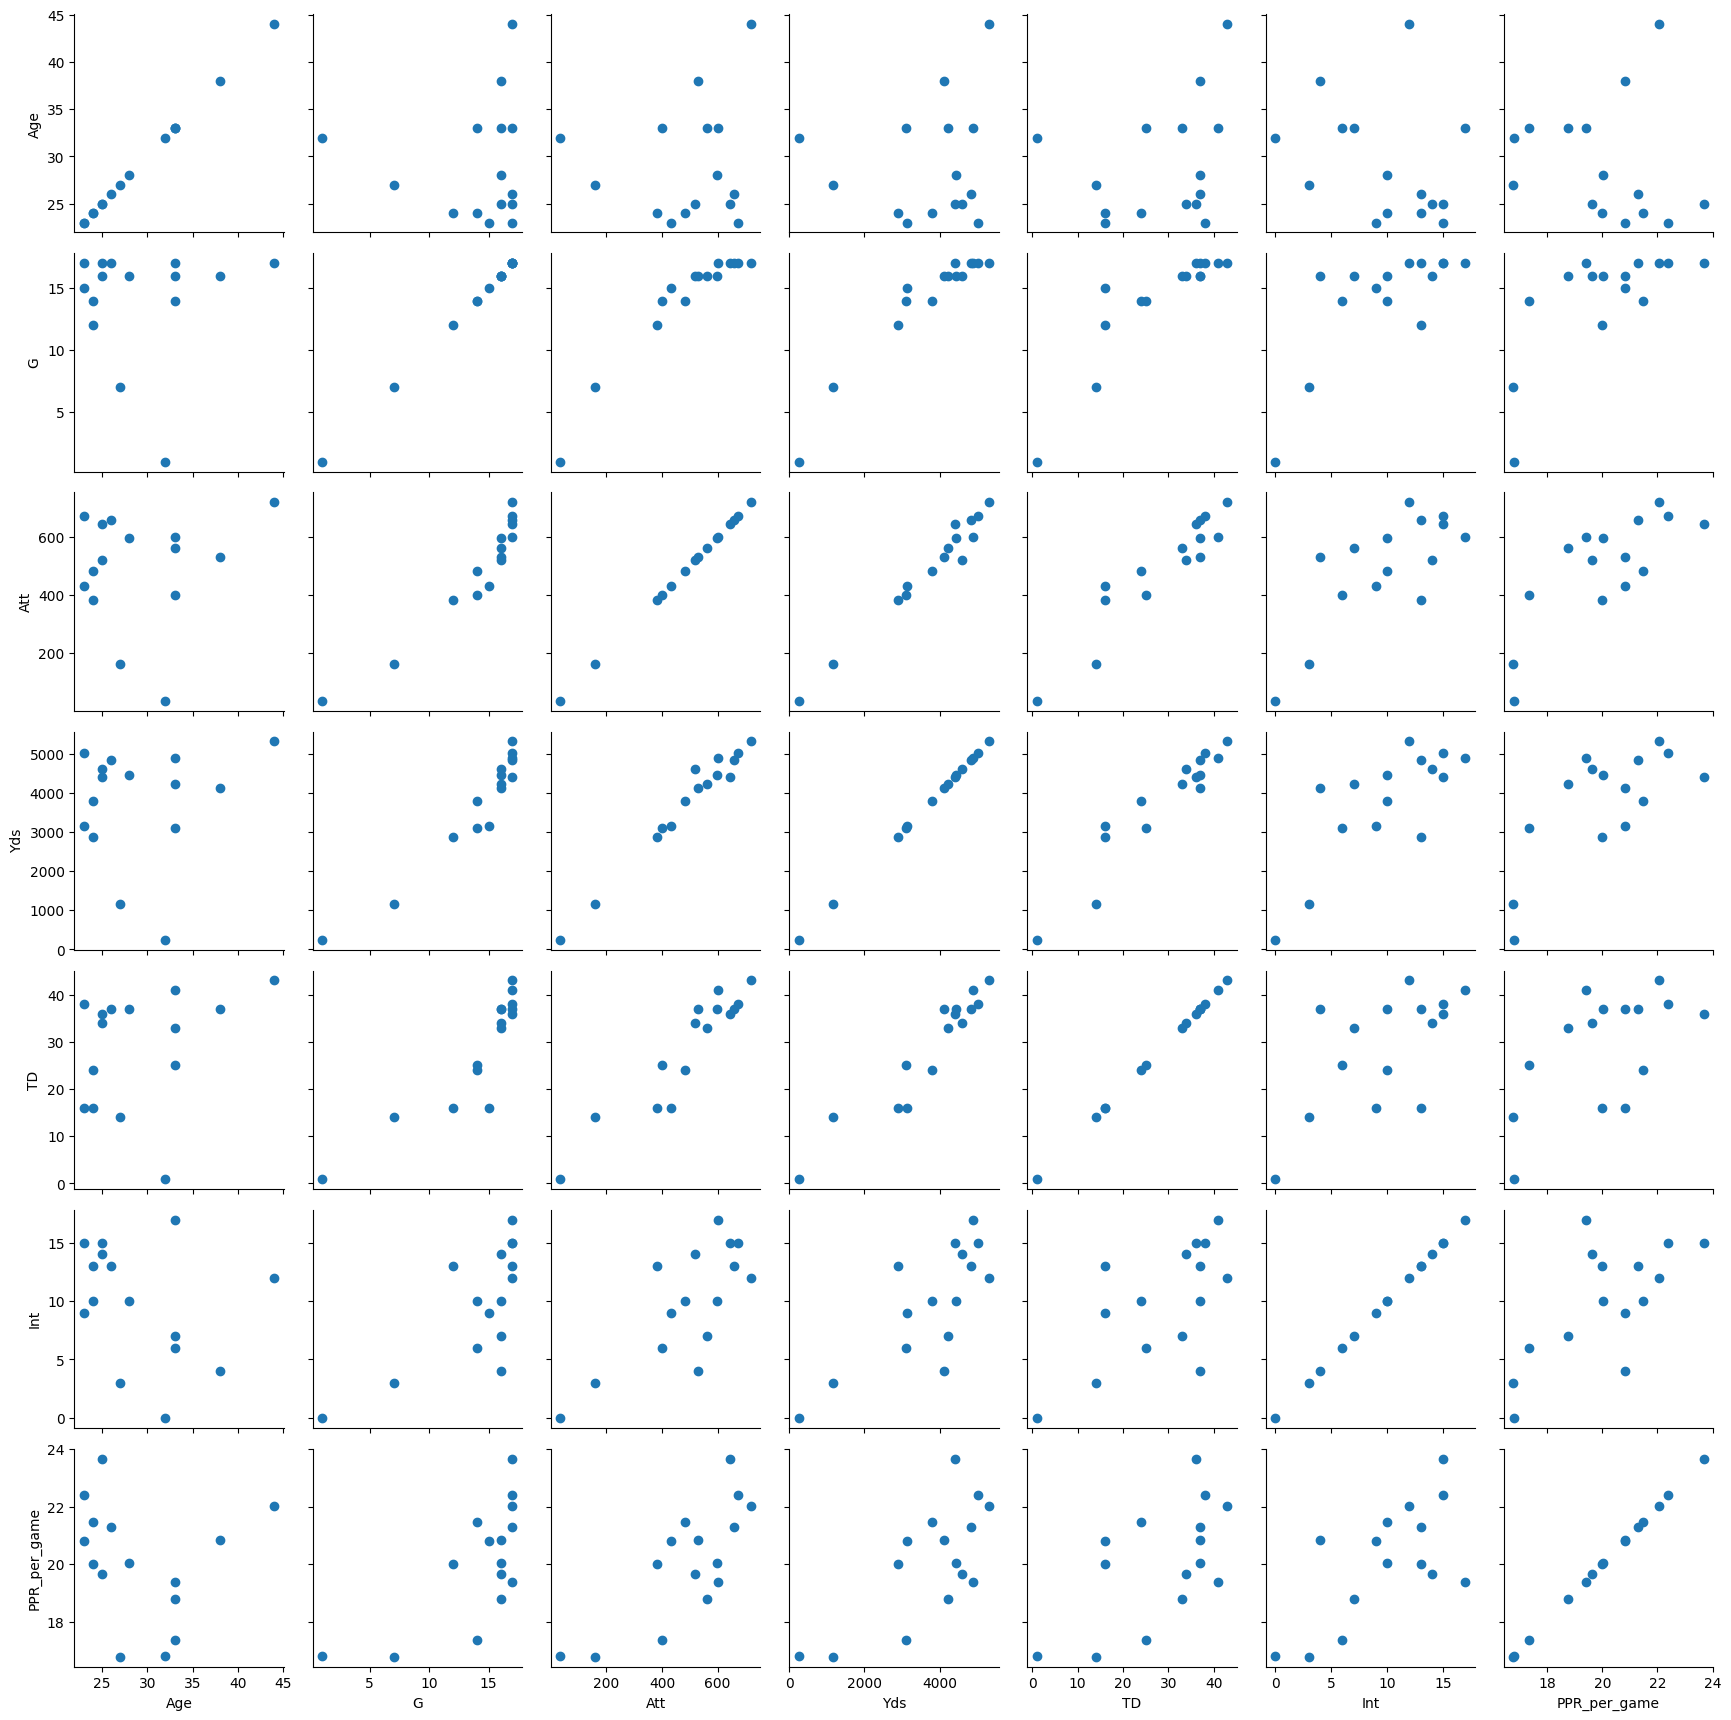

In [1026]:
# Creating scatter plot to see if the top 15 Quaterback data had any positive correlation 
g = sns.PairGrid(qb15)
g.map(plt.scatter)

<AxesSubplot:xlabel='FantPos', ylabel='PPR_per_game'>

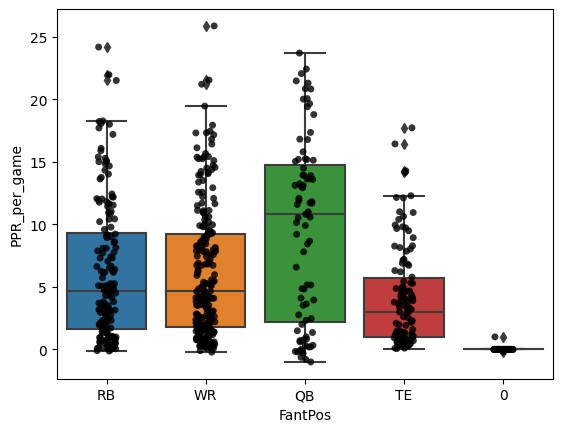

In [1027]:
# Box plot of all the positions and points scored per game
sns.boxplot(x="FantPos", y="PPR_per_game", data = nfl)
sns.stripplot(x="FantPos", y="PPR_per_game", data = nfl,
                jitter=True,
                marker='o',
                alpha=0.8,
                color='black')